In [1]:
from datetime import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
def compute_turnover(port):
    to = (port.fillna(0)-port.shift().fillna(0)).abs().sum(1)   
    return to

In [3]:
def compute_sharpe_ratio(returns):
    return returns.mean() / returns.std() * np.sqrt(24*252) 

In [4]:
def compute_stats(rets):
    stats={}
    stats['avg'] = rets.mean()*252*24
    stats['vol'] = rets.std()*np.sqrt(252*24)
    stats['sharpe'] = stats['avg']/stats['vol']
    stats['hit_rate'] = rets[rets>0].count() / rets.count()
    stats = pd.DataFrame(stats)
    return stats

In [5]:
def drawdown(px):
    return (px / (px.expanding(min_periods=1).max()) - 1)

In [6]:
def plot_signals(ret, port, short_window, long_window, coin_name):
    plt.figure(figsize=(16, 6))

    # Calculate cumulative returns
    cum_ret = ret[coin_name].cumsum()
    plt.plot(ret.index, cum_ret, label=f'{coin_name} Cumulative Returns', color='blue', alpha=0.5)
    
    # Plot buy signals
    buy_signals = (port[coin_name] > 0)
    plt.plot(ret.index[buy_signals], cum_ret[buy_signals], '^', markersize=6, color='green', lw=0, label='Buy Signal')

    # Plot sell signals
    sell_signals = (port[coin_name] < 0)
    plt.plot(ret.index[sell_signals], cum_ret[sell_signals], 'v', markersize=6, color='red', lw=0, label='Sell Signal')

    # Plotting short and long moving averages of cumulative returns
    short_ma = cum_ret.rolling(short_window, min_periods=1).mean()
    long_ma = cum_ret.rolling(long_window, min_periods=short_window).mean()
    plt.plot(ret.index, short_ma, label=f'Short MA ({short_window})', color='orange')
    plt.plot(ret.index, long_ma, label=f'Long MA ({long_window})', color='purple')

    plt.title(f'Moving Average Crossover with Buy/Sell Signals for {coin_name}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show()

In [7]:
from_pickle = pd.read_pickle('CoinGecko_px_1H.pkl')
# Resample the data to hourly intervals, taking the first non-null value in each hour
# from_pickle = from_pickle.resample('H').first() 
crypto_px = from_pickle
crypto_px 

/var/folders/9_/_hcc1_5d3mbf6gs_r1f4gbsm0000gn/T/ipykernel_2303/1133220204.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  from_pickle = from_pickle.resample('H').first()


,VNST,FDUSD,DAR,WETH,USDT,USDC,XRP,SOL,TON,BTC,...,CELR,CLORE,TOKEN,BLZ,BEER,XSGD,SFP,ALPHA,METIS,AGG
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.192493,NaN,NaN,7195.153895,...,0.003559,NaN,NaN,0.015567,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.192267,NaN,NaN,7176.662158,...,0.003562,NaN,NaN,0.015507,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.193050,NaN,NaN,7204.763276,...,0.003594,NaN,NaN,0.015666,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.193580,NaN,NaN,7229.077200,...,0.003622,NaN,NaN,0.015824,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.193394,NaN,NaN,7221.090859,...,0.003623,NaN,NaN,0.015793,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 05:00:00,0.000039,0.998958,0.214032,2637.044308,1.000211,0.998089,0.566714,142.317312,6.969696,58587.230439,...,0.010872,0.056665,0.058087,0.132135,0.000011,0.761665,0.733103,0.056023,31.130160,0.000129
2024-08-19 06:00:00,0.000039,1.001013,0.240563,2629.599283,1.000247,1.000268,0.567050,142.625114,6.921028,58504.100944,...,0.010821,0.055548,0.056981,0.131816,0.000011,0.764548,0.732121,0.055963,31.227453,0.000131
2024-08-19 07:00:00,0.000039,1.002329,0.231353,2625.886735,1.000151,1.000394,0.572713,142.916457,6.851694,58566.248972,...,0.010867,0.055493,0.057598,0.132193,0.000011,0.761338,0.731185,0.056482,31.252714,0.000126


In [8]:
# Calculate the total number of data points for each coin
total_data_points = len(crypto_px)

# Calculate the number of non-NA/null entries for each coin
non_null_counts = crypto_px.notnull().sum()

# Calculate the threshold for 95% of data points
threshold = 0.90 * total_data_points

# Filter out coins with less than 95% of data points
crypto_px = crypto_px.loc[:, non_null_counts >= threshold]

crypto_px

,XRP,BTC,ETH,BNB,DOGE,TRX,LTC,LINK,ADA,FTM,...,UTK,IOTA,ONE,ONT,KAVA,BAND,HOT,ZEN,CELR,BLZ
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.192493,7195.153895,128.812416,13.683832,0.002026,0.013296,41.176294,1.759009,0.032668,0.010862,...,0.010684,0.160058,0.004548,0.517595,1.123952,0.222692,0.000625,9.133995,0.003559,0.015567
2020-01-01 01:00:00,0.192267,7176.662158,128.859036,13.693838,0.002028,0.013222,41.276043,1.760545,0.032757,0.010905,...,0.010751,0.160234,0.004582,0.516744,1.118914,0.221489,0.000629,9.251777,0.003562,0.015507
2020-01-01 02:00:00,0.193050,7204.763276,130.176809,13.787427,0.002033,0.013345,41.537578,1.779163,0.032935,0.010972,...,0.010813,0.160373,0.004597,0.522013,1.124761,0.220111,0.000630,8.634297,0.003594,0.015666
2020-01-01 03:00:00,0.193580,7229.077200,130.646876,13.834837,0.002023,0.013365,41.760098,1.793839,0.033118,0.010882,...,0.010856,0.160288,0.004641,0.520840,1.131254,0.220316,0.000632,8.417181,0.003622,0.015824
2020-01-01 04:00:00,0.193394,7221.090859,130.105557,13.802292,0.002018,0.013281,41.512371,1.788124,0.032991,0.010817,...,0.010838,0.159786,0.004661,0.518648,1.131902,0.222118,0.000633,8.443030,0.003623,0.015793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 05:00:00,0.566714,58587.230439,2633.445935,533.954062,0.100290,0.134463,66.300452,10.114657,0.333643,0.384681,...,0.035451,0.130301,0.010666,0.166674,0.315271,1.066680,0.001357,7.733291,0.010872,0.132135
2024-08-19 06:00:00,0.567050,58504.100944,2620.059478,533.970356,0.100055,0.134602,66.174635,10.091833,0.332597,0.381483,...,0.035663,0.129450,0.010711,0.166572,0.315647,1.071042,0.001354,7.719074,0.010821,0.131816
2024-08-19 07:00:00,0.572713,58566.248972,2630.593135,535.297628,0.100060,0.135110,66.297656,10.154507,0.333506,0.380925,...,0.037421,0.130822,0.010743,0.165555,0.316396,1.069829,0.001369,7.741228,0.010867,0.132193


In [9]:
coins_ret = crypto_px / crypto_px.shift() -1
coins_ret

,XRP,BTC,ETH,BNB,DOGE,TRX,LTC,LINK,ADA,FTM,...,UTK,IOTA,ONE,ONT,KAVA,BAND,HOT,ZEN,CELR,BLZ
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,-0.001172,-0.002570,0.000362,0.000731,0.001144,-0.005593,0.002422,0.000873,0.002702,0.003937,...,0.006285,0.001100,0.007357,-0.001645,-0.004482,-0.005404,0.006129,0.012895,0.000867,-0.003848
2020-01-01 02:00:00,0.004072,0.003916,0.010226,0.006834,0.002247,0.009342,0.006336,0.010575,0.005441,0.006127,...,0.005769,0.000867,0.003268,0.010197,0.005225,-0.006219,0.002646,-0.066742,0.009007,0.010248
2020-01-01 03:00:00,0.002743,0.003375,0.003611,0.003439,-0.004867,0.001496,0.005357,0.008249,0.005557,-0.008204,...,0.003946,-0.000527,0.009576,-0.002247,0.005773,0.000930,0.002451,-0.025146,0.007782,0.010086
2020-01-01 04:00:00,-0.000958,-0.001105,-0.004143,-0.002352,-0.002296,-0.006288,-0.005932,-0.003186,-0.003837,-0.005932,...,-0.001591,-0.003134,0.004429,-0.004209,0.000572,0.008180,0.001355,0.003071,0.000151,-0.001936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 05:00:00,0.000480,-0.001328,-0.004925,-0.006002,-0.000663,-0.001280,0.003131,-0.006119,-0.000822,-0.016486,...,-0.015171,0.001893,-0.012808,-0.005641,-0.004730,-0.007762,-0.003309,-0.006291,-0.001768,-0.006799
2024-08-19 06:00:00,0.000593,-0.001419,-0.005083,0.000031,-0.002344,0.001034,-0.001898,-0.002257,-0.003135,-0.008314,...,0.005969,-0.006531,0.004223,-0.000608,0.001192,0.004089,-0.002589,-0.001838,-0.004716,-0.002413
2024-08-19 07:00:00,0.009987,0.001062,0.004020,0.002486,0.000048,0.003773,0.001859,0.006210,0.002733,-0.001463,...,0.049306,0.010602,0.003034,-0.006110,0.002374,-0.001133,0.011006,0.002870,0.004330,0.002856


In [10]:
end_of_insample = pd.Timestamp('2021-12-31')
in_sample_ret = coins_ret.loc[:end_of_insample]

In [11]:
def generate_signals(ret, short_window, long_window, strategy_type):
    short_window = short_window*24
    long_window = long_window*24
    # Calculate short-term and long-term moving averages of returns
    short_ma = ret.rolling(short_window, min_periods=1).mean()
    long_ma = ret.rolling(long_window, min_periods=short_window).mean()

    if strategy_type == 'TS':
        # 1. The z-score of the past 10 day returns, and it tells us if a coin is doing better than it usually does.
        signal = np.sqrt(short_window) * (short_ma - long_ma)
        signal = signal / ret.rolling(long_window, min_periods=short_window).std()
        
        # 2. Pass the signal through a tanh function to curtail these
        port = np.tanh(signal)
        
    elif strategy_type == 'XS':
        signal = short_ma - long_ma 
        
        # 1. Rank the signal across assets at each time point
        ranked = signal.rank(1)

        # 2. Demean the ranked signal to achieve dollar neutrality
        port = ranked.subtract(ranked.mean(1), 0)

    # Normalize the portfolio to be fully invested (sum of port = 1)
    port = port.div(port.abs().sum(1), 0)

    return signal, port

In [12]:
# Define the ranges for short and long windows
short_window_range = range(1, 53, 3) 
long_window_range = range(100, 266, 10)

# Initialize a DataFrame to store Sharpe ratios
sharpe_ratios = pd.DataFrame(index=short_window_range, columns=long_window_range)

# Calculate Sharpe ratios for each combination of short and long windows
for short_window in short_window_range:
    for long_window in long_window_range:
        signal, port = generate_signals(coins_ret, short_window, long_window, 'TS')
        strat_gross_ret = (port.shift()*coins_ret).sum(1)

        # Net of transaction costs returns
        to = compute_turnover(port)
        tcost_bps = 20 # (commissions + slip)
        strat_net_ret = strat_gross_ret.subtract(to * tcost_bps * 1e-4, fill_value=0)
        in_sample_ret = strat_net_ret.loc[:end_of_insample]

        sharpe_ratio = compute_sharpe_ratio(in_sample_ret)
        sharpe_ratios.loc[short_window, long_window] = sharpe_ratio

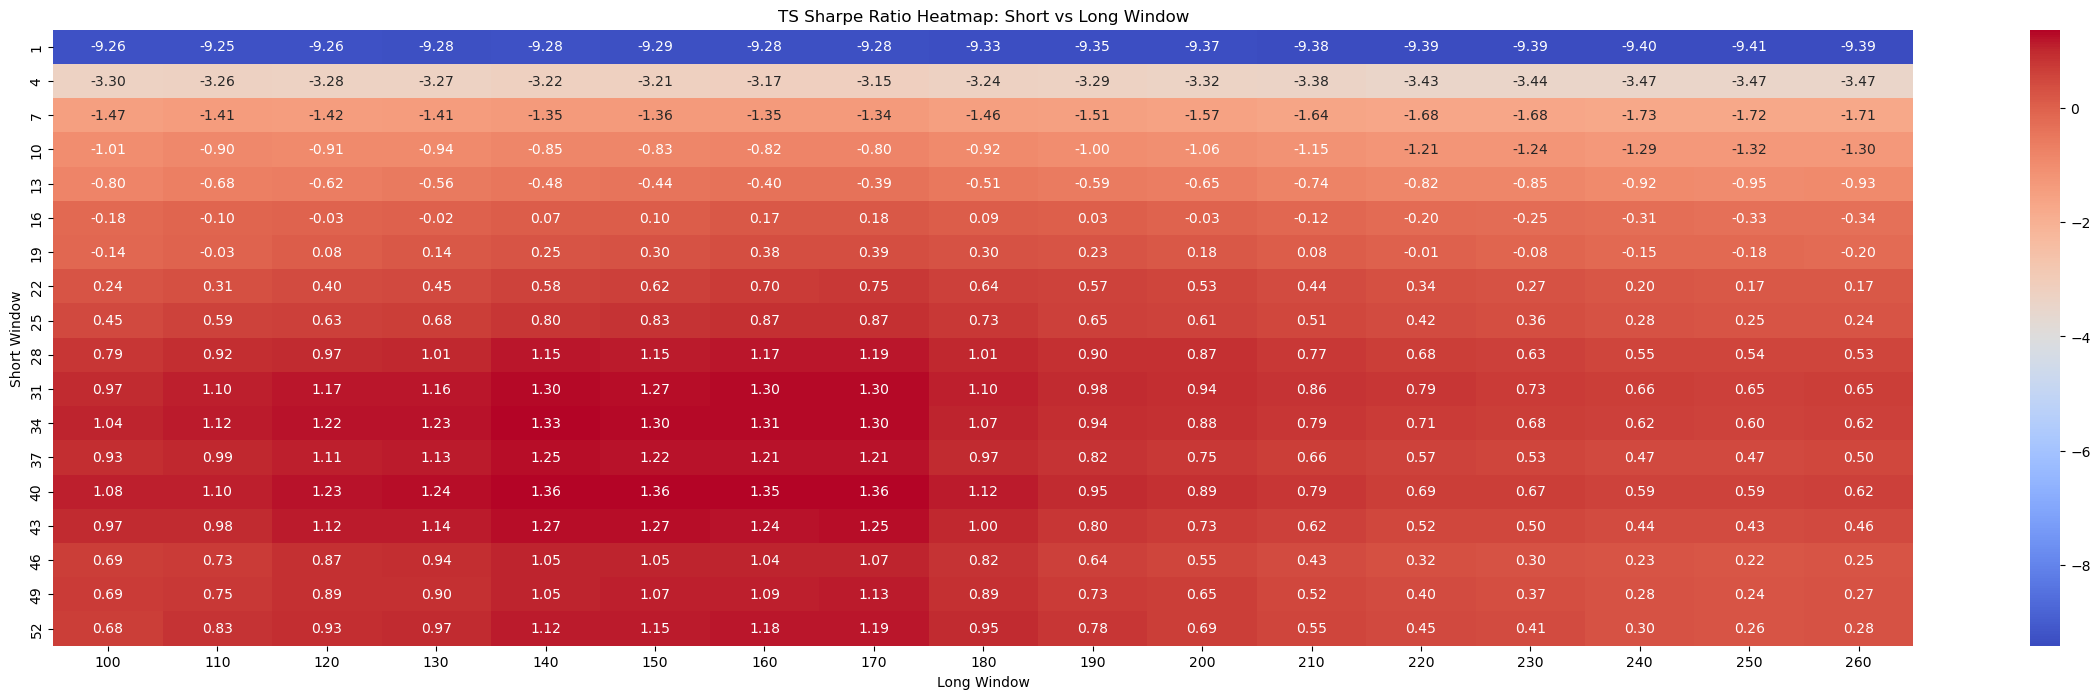

In [13]:
# Plot the heatmap
plt.figure(figsize=(30, 8))
sns.heatmap(sharpe_ratios.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("TS Sharpe Ratio Heatmap: Short vs Long Window")
plt.xlabel("Long Window")
plt.ylabel("Short Window")
plt.show()

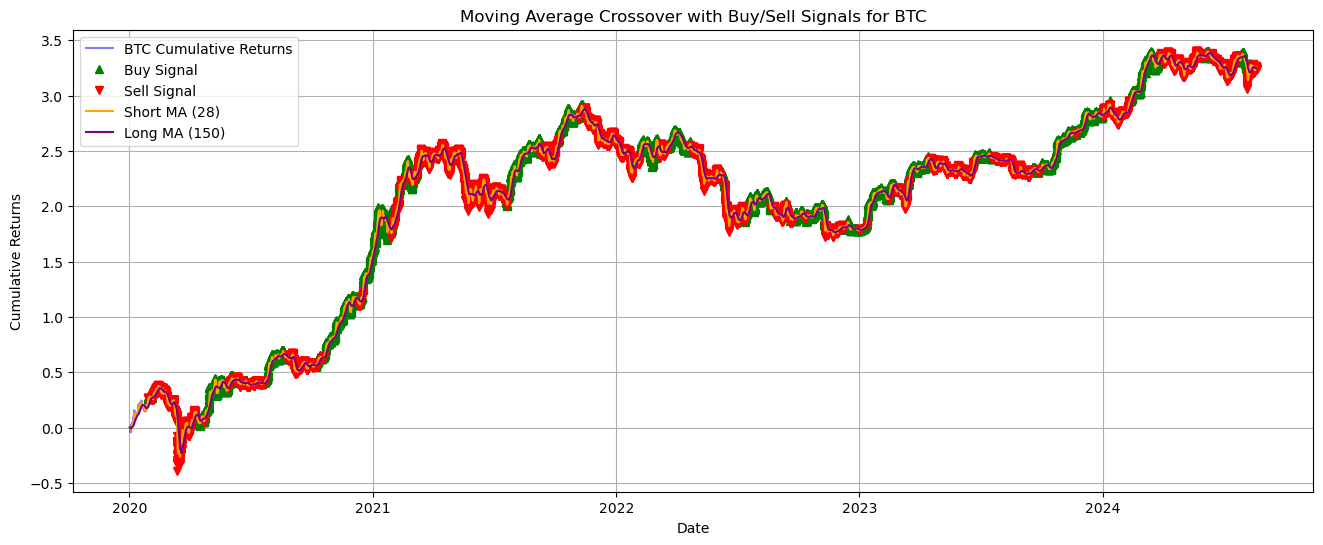

In [14]:
# out-of-sample tests
signal, port = generate_signals(coins_ret, 28, 160, 'TS')

# for coin in coins_ret.columns:
#     plot_signals(coins_ret, signal, 20, 150, coin)
plot_signals(coins_ret, port, 28, 150, 'BTC')

In [15]:
strat_gross_ret = (port.shift()*coins_ret).sum(1)
            
# Net of transaction costs returns
to = compute_turnover(port)
tcost_bps = 20 # (commissions + slip)
strat_net_ret = strat_gross_ret.subtract(to * tcost_bps * 1e-4, fill_value=0)

print(f"The average turnover is {to.mean()}")
print(f"The holding period is {2/to.mean()/24} days")

The average turnover is 0.04849971364972973
The holding period is 1.7182232030311733 days


In [16]:
full_sample_ret = pd.DataFrame({
    'ts_strat_ret': strat_net_ret,
    'buy_and_hold_btc': coins_ret['BTC']
})

full_sample_stats = compute_stats(full_sample_ret)
print(full_sample_stats)

                       avg       vol    sharpe  hit_rate
ts_strat_ret     -0.007190  0.543988 -0.013218  0.488010
buy_and_hold_btc  0.483665  0.554538  0.872195  0.503989


<Axes: xlabel='Date'>

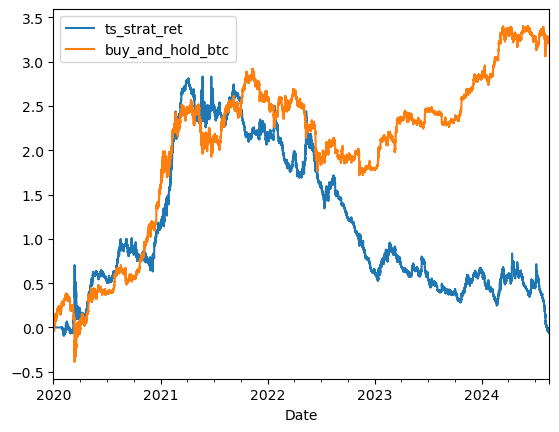

In [17]:
full_sample_ret.cumsum().plot()

In [18]:
# Define the ranges for short and long windows
short_window_range = range(1, 50, 3) 
long_window_range = range(100, 266, 10)

# Initialize a DataFrame to store Sharpe ratios
sharpe_ratios = pd.DataFrame(index=short_window_range, columns=long_window_range)

# Calculate Sharpe ratios for each combination of short and long windows
for short_window in short_window_range:
    for long_window in long_window_range:
        signal, port = generate_signals(coins_ret, short_window, long_window, 'XS')
        strat_gross_ret = (port.shift()*coins_ret).sum(1)

        # Net of transaction costs returns
        to = compute_turnover(port)
        tcost_bps = 20 # (commissions + slip)
        strat_net_ret = strat_gross_ret.subtract(to * tcost_bps * 1e-4, fill_value=0)
        in_sample_ret = strat_net_ret.loc[:end_of_insample]

        sharpe_ratio = compute_sharpe_ratio(in_sample_ret)
        sharpe_ratios.loc[short_window, long_window] = sharpe_ratio

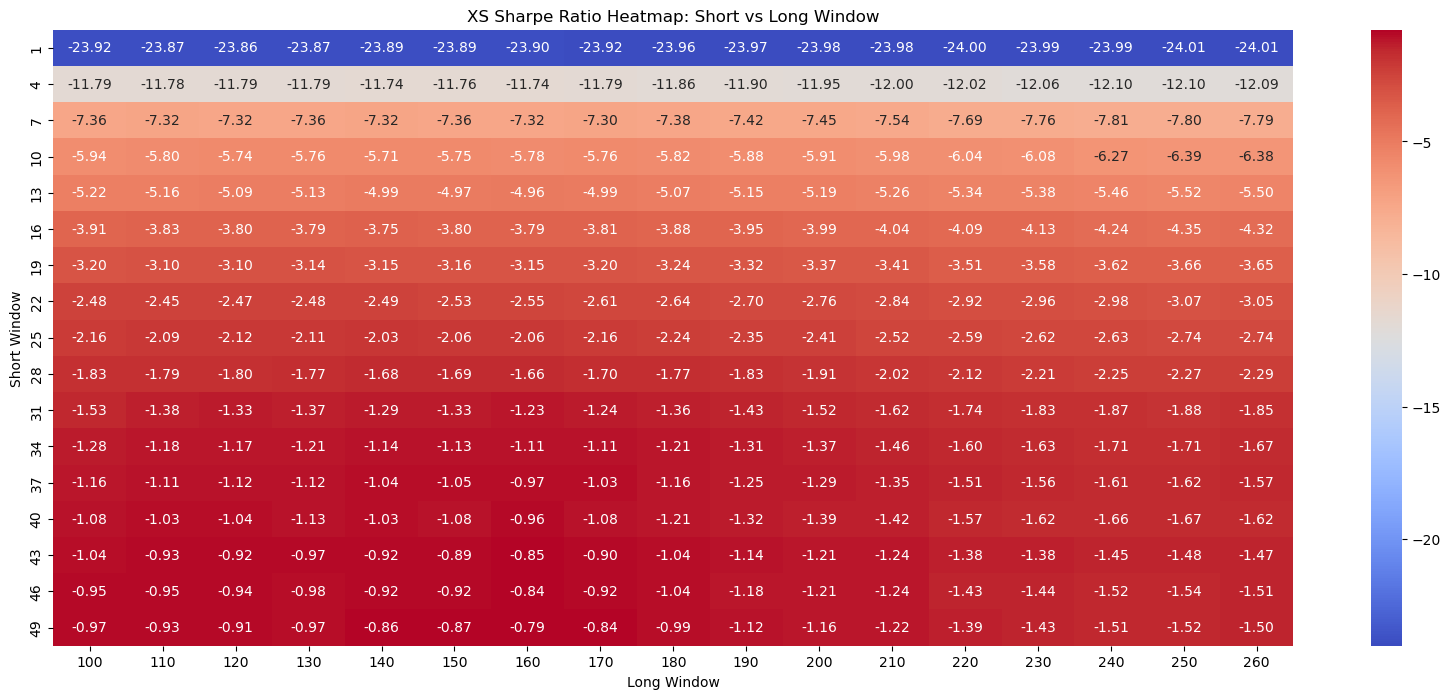

In [19]:
# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(sharpe_ratios.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("XS Sharpe Ratio Heatmap: Short vs Long Window")
plt.xlabel("Long Window")
plt.ylabel("Short Window")
plt.show()

In [20]:
# out-of-sample tests
signal, port = generate_signals(coins_ret, 40, 180, 'XS')

strat_gross_ret = (port.shift()*coins_ret).sum(1)
            
# Net of transaction costs returns
to = compute_turnover(port)
tcost_bps = 20 # (commissions + slip)
strat_net_ret = strat_gross_ret.subtract(to * tcost_bps * 1e-4, fill_value=0)

print(f"The average turnover is {to.mean()}")
print(f"The holding period is {2/to.mean()/24} days")

The average turnover is 0.048706211589349055
The holding period is 1.7109385151103897 days


In [21]:
full_sample_ret = pd.DataFrame({
    'xs_strat_ret': strat_net_ret,
    'buy_and_hold_btc': coins_ret['BTC']
})

full_sample_stats = compute_stats(full_sample_ret)
print(full_sample_stats)

                       avg       vol    sharpe  hit_rate
xs_strat_ret     -0.639907  0.225307 -2.840153  0.451721
buy_and_hold_btc  0.483665  0.554538  0.872195  0.503989


<Axes: xlabel='Date'>

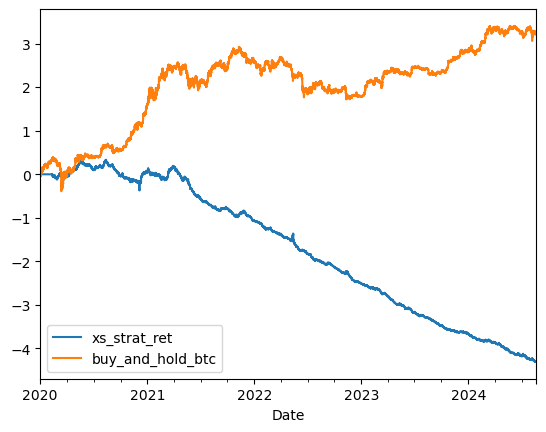

In [22]:
full_sample_ret.cumsum().plot()